# Regression analysis
Regression models are used to predict target variables on a continuous scale, which makes them attractive for addressing many questions in science as well as applications in industry, such as understanding relationships between variables, evaluating trends, or making forecasts. One example would be predicting the sales of a company in future months.


Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them.

Regression analysis is an important tool for modelling and analyzing data. Here, we fit a curve / line to the data points, in such a manner that the differences between the distances of data points from the curve or line is minimized.

#### Benefits of using regression analysis:
* It indicates the significant relationships between dependent variable and independent variable.
* It indicates the strength of impact of multiple independent variables on a dependent variable.

Regression analysis also allows us to compare the effects of variables measured on different scales, such as the effect of price changes and the number of promotional activities. These benefits help market researchers / data analysts / data scientists to eliminate and evaluate the best set of variables to be used for building predictive models.


One of the primary goals of any scientist is to find patterns in data and build models to describe, predict, and extract insight from those patterns. The most fundamental of these patterns is a linear relationship between two variables. 


# Simple linear regression
Simple linear regression is a model that assesses the relationship between a dependent variable and one independent variable. The simple linear model is expressed using the following equation:

Y = a + bX + ϵ


Where:

Y – dependent variable

X – independent (explanatory) variable

a – intercept

b – slope

ϵ – residual (error)

Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. 

It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. 

For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.

The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible.



# Multiple linear regression
Multiple linear regression analysis is essentially similar to the simple linear model, with the exception that multiple independent variables are used in the model. The mathematical representation of multiple linear regression is:

Y = a + b$X_{1}$ + c$X_{2}$ + d$X_{3}$ + ϵ

Where:

Y – dependent variable

$X_{1}$, $X_{2}$, $X_{3}$ – independent (explanatory) variables

a – intercept

b, c, d – slopes

ϵ – residual (error)

# Real-time example : 
We have a dataset which contains information about customers' quarterly balance, their demographic and Wallet transaction. 

Goal is to design a model that can predict Wallet transaction if given the customers' information. 

A linear regression line can be obtained from the given data which will give minimum error. This linear equation is then used for any new data. That is, if we give information of any customer as an input, our model should predict their Wallet transaction with minimum error.

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [90]:
# read data into a DataFrame
import pandas as pd
data = pd.read_csv('Data/Linr_Reg_data_v01.csv', index_col=0)
print(data.head())

         Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1  Wallet_trx  \
Cust_id                                                                       
C10803         14        33        40     50000             0.1          10   
C2666           8        21        35         9             0.1          10   
C6690           2         9        15         2             0.1          10   
C2703          12        29        15        13             0.1          10   
C8114           1         7        14         1             0.1          10   

          Age  Gender  Area  
Cust_id                      
C10803   57.0  Female  East  
C2666    52.0    Male  West  
C6690    52.0    Male   NaN  
C2703    45.0  Female  East  
C8114    51.0  Female  East  


In [58]:
print(data.shape)

(10100, 9)


There are 10100 customers information in the data with 9 variables. Out of these 9, 1 is target variable and rest 8 are predictor variables.

What are the **features**?
- Qtrx_Bal: Quarterly Balance (in thousands of Rupees)
- Perc_inc_q4_q1: Percentage increase in Quarter 4 from Quarter 1
- Age: Age of the customer
- Gender: Gender of the customer
- Area: Area of the customer

What is the **response**?
- Wallet_trx: Wallet transaction (in thousands of Rupees)

## Questions About the Customers Data

Let's say you work for the company that creates digital wallet for theor customers. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are to find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="08_slope_intercept.png">

### The mathematics behind the Least Squares Method.

Take a quick look at the plot we created. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png">

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were:
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$

These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations  to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here.

# Scikit-Learn
Scikit-learn is an open source Python library that implements a range of machine learning, pre-processing, cross-validation and visualization algorithms using a unified interface. 

Scikit-learn provides algorithms for machine learning tasks including classification, regression, dimensionality reduction, and clustering. It also provides modules for extracting features, processing data, and evaluating models.


Let's create a simple linear regression model using scikit-learn. 
Do not forget to import LinearRegression from scikit-learn.

In [11]:
from sklearn.linear_model import LinearRegression

In [15]:
# create X and y
feature_cols = ['Qtr1_Bal']
X = data[feature_cols]
y = data.Wallet_trx

# follow the usual sklearn pattern: import, instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_[0])

54.81166971445027
-0.008087844809396297


## Interpreting Model Coefficients

How do we interpret the Qtr1_Bal coefficient ($\beta_1$)?
- A "unit" increase in Qtr1_Bal is **associated with** a Rs 0.008088 decrease in Wallet_trx.
- Or more clearly: An additional Rs 1,000 in Qtr1_Bal is **associated with** a decrease in Wallet_trx of Rs 8.088.

Note that if an increase in Qtr1_Bal spending was associated with a **increase** in Wallet_trx, $\beta_1$ would be **positive**.

## Using the Model for Prediction

Let's say that there was a new customer where the Qtr1_Bal was **10**. What would we predict for the Wallet_trx for that customer?

$$y = \beta_0 + \beta_1x$$
$$y = 54.81167 - 0.008088 \times 10$$

In [16]:
# manually calculate the prediction
54.81167 - 0.008088*10

54.73079

Thus, we would predict Wallet_trn of **Rs 54.73079** for that customer.

In [19]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'Qtr1_Bal': [10]})
X_new.head()

,Qtr1_Bal
0,10


In [20]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([54.73079127])

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [21]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'Qtr1_Bal': [data.Qtr1_Bal.min(), data.Qtr1_Bal.max()]})
X_new.head()

,Qtr1_Bal
0,1
1,15


In [22]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([54.80358187, 54.69035204])

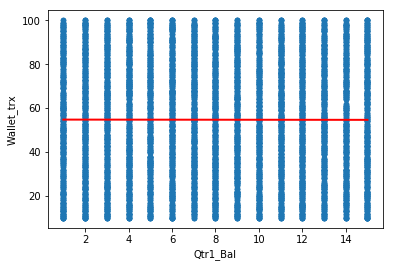

In [28]:
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

# first, plot the observed data
data.plot(kind='scatter', x='Qtr1_Bal', y='Wallet_trx')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

# Matplotlib
To make necessary statistical inferences, it becomes necessary to visualize your data and **Matplotlib** is one such solution for the Python users. 

It is a very powerful plotting library useful for those working with Python and NumPy. The most used module of Matplotib is Pyplot which provides an interface like MATLAB but instead, it uses Python and it is open source.

## Confidence in our Model

**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [29]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Wallet_trx ~ Qtr1_Bal', data=data).fit()
lm.conf_int()

,0,1
Intercept,53.734904,55.888436
Qtr1_Bal,-0.126929,0.110754


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [30]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    0.000000
Qtr1_Bal     0.893878
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for Qtr1_Bal is far greater than 0.05, and so we **believe** that there is not a relationship between Qtr1_Bal and Wallet_trx.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

<img src="images/08_r_squared.png">

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

In [31]:
# print the R-squared value for the model
lm.rsquared

1.76235611903941e-06

Is that a "good" R-squared value? It's not. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

# Check Missing Value 

In [59]:
print(data.isnull().sum())

Qtr1_Bal             0
Qtr2_Bal             0
Qtr3_Bal             0
Qtr4_Bal             0
Perc_inc_q4_q1       0
Wallet_trx           0
Age               1781
Gender               0
Area                26
dtype: int64


We can see there are missing values in Age and Area.


There are multiple ways to treat the missing values. Some of them are : 

* Remove rows with missing values
* Remove columns with missing values
* Replace the missing values with a unique constant value, mean/mode, etc

There are few ML algorithms which support missing values which we will discuss later.

In [60]:
print(data.shape)

(10100, 9)


Out of 10100, 26 rows have Area missing. 

Let's replace the missing values of Area by mode value of Area.

In [91]:
# Find the mean value of Age
print(data.Area.mode())

0    West
dtype: object


In [92]:
# Replace the missing values in Area by mode value of Area
data.loc[data['Area'].isnull(),'Area'] = 'West'

In [93]:
print(data['Area'].mode())

0    West
dtype: object


Mode remains same as we have replaced missing values with mode only.

In [94]:
print(data['Area'].isnull().sum())

0


Now, no missing value in Area.

Let's do the missing value treatment for Age variable.

In [95]:
print(1781/10100)

0.17633663366336633


Almost 18% missing values. Since we have a lot of missing values here, we can drop this column.

In [98]:
data = data.drop('Age',axis=1)
print(data.shape)
print(data.isnull().sum())

(10100, 8)
Qtr1_Bal          0
Qtr2_Bal          0
Qtr3_Bal          0
Qtr4_Bal          0
Perc_inc_q4_q1    0
Wallet_trx        0
Gender            0
Area              0
dtype: int64


# Outlier Treatment
1. Find the Outliers
2. Remove the Outliers

In [99]:
data.describe()

,Qtr1_Bal,Qtr2_Bal,Qtr3_Bal,Qtr4_Bal,Perc_inc_q4_q1,Wallet_trx
count,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000
mean,7.980000,20.960000,22.454059,25.527525,0.547471,54.747129
std,4.291211,8.582422,6.487213,710.108537,0.261436,26.143628
min,1.000000,7.000000,10.000000,1.000000,0.100000,10.000000
25%,4.000000,13.000000,18.000000,6.000000,0.320000,32.000000
50%,8.000000,21.000000,22.000000,12.000000,0.550000,55.000000
75%,12.000000,29.000000,27.000000,18.000000,0.770000,77.000000
max,15.000000,35.000000,40.000000,50000.000000,1.000000,100.000000


From above we can see, Qtr4_Bal has max 50000 which seems outlier. We need to check if there is a single outlier or multiple such outliers.

In [100]:
print(data.loc[data.Qtr4_Bal>100,'Qtr4_Bal'])

Cust_id
C10803    50000
C10020    40000
C6176     30000
C8563      9000
C10031     4000
Name: Qtr4_Bal, dtype: int64


We can see there are 5 values in Qtr4_Bal which are very high. 

We can either remove these rows or replace these values with the mean value.

In [101]:
# Remove these rows
print("Shape of the Data before removing outliers : ",data.shape)
data = data[data['Qtr4_Bal']<100]
print("Shape of the Data after removing outliers : ",data.shape)

Shape of the Data before removing outliers :  (10100, 8)
Shape of the Data after removing outliers :  (10095, 8)


In [102]:
print(data.head())

         Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1  Wallet_trx  \
Cust_id                                                                       
C2666           8        21        35         9             0.1          10   
C6690           2         9        15         2             0.1          10   
C2703          12        29        15        13             0.1          10   
C8114           1         7        14         1             0.1          10   
C10899          9        23        13        10             0.1          10   

         Gender  Area  
Cust_id                
C2666      Male  West  
C6690      Male  West  
C2703    Female  East  
C8114    Female  East  
C10899     Male  West  


# Categorical Variables treatment
Scikit-learn needs all variables to be numeric. Hence categorical/string variables need to be converted into numeric.
This can be done using pandas' get_dummies() function.

In [103]:
print(pd.get_dummies(data['Gender']))

         Female  Male
Cust_id              
C2666         0     1
C6690         0     1
C2703         1     0
C8114         1     0
C10899        0     1
...         ...   ...
C2201         1     0
C2431         0     1
C6541         1     0
C7998         0     1
C4176         1     0

[10095 rows x 2 columns]


As we can see the Gender variable is now converted into two variables : Male and Female

Append this data into original data and remove Gender from it.

In [111]:
data = pd.concat([data,pd.get_dummies(data.Gender)],axis=1)
data = data.drop('Gender',axis=1)

AttributeError: 'DataFrame' object has no attribute 'Gender'

In [109]:
print(data.head())

         Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1  Wallet_trx  \
Cust_id                                                                       
C2666           8        21        35         9             0.1          10   
C6690           2         9        15         2             0.1          10   
C2703          12        29        15        13             0.1          10   
C8114           1         7        14         1             0.1          10   
C10899          9        23        13        10             0.1          10   

         Area  Female  Male  
Cust_id                      
C2666    West       0     1  
C6690    West       0     1  
C2703    East       1     0  
C8114    East       1     0  
C10899   West       0     1  


In [113]:
print(data.shape)

(10095, 12)


Repeat the same process for Area variable also.

In [112]:
data = pd.concat([data,pd.get_dummies(data.Area)],axis=1)
data = data.drop('Area',axis=1)

In [114]:
print(data.shape)

(10095, 12)


In [115]:
print(data.head())

         Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal  Perc_inc_q4_q1  Wallet_trx  \
Cust_id                                                                       
C2666           8        21        35         9             0.1          10   
C6690           2         9        15         2             0.1          10   
C2703          12        29        15        13             0.1          10   
C8114           1         7        14         1             0.1          10   
C10899          9        23        13        10             0.1          10   

         Female  Male  East  North  South  West  
Cust_id                                          
C2666         0     1     0      0      0     1  
C6690         0     1     0      0      0     1  
C2703         1     0     1      0      0     0  
C8114         1     0     1      0      0     0  
C10899        0     1     0      0      0     1  


# Multiple Linear Regression
Now, let's create a multiple linear regression model using scikit-learn.

In [140]:
# create X and y
feature_cols = ['Qtr1_Bal', 'Qtr2_Bal', 'Qtr3_Bal','Qtr4_Bal','Female', 'Male', 'North','South','East','West']
X = data[feature_cols]
y = data.Wallet_trx

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

83.91198664602084
[-2.97434048 -5.94868097  0.01308078  9.62443314 -0.08061783  0.08061783
 -0.28246338  0.21591401  0.10143983 -0.03489045]


How do we interpret these coefficients?

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [138]:
lm = smf.ols(formula='Wallet_trx ~ Qtr1_Bal + Qtr2_Bal + Qtr3_Bal + Qtr4_Bal + Female + Male + North + South + East + West', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wallet_trx   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     4888.
Date:                Sun, 01 Sep 2019   Prob (F-statistic):               0.00
Time:                        02:00:46   Log-Likelihood:                -39796.
No. Observations:               10095   AIC:                         7.961e+04
Df Residuals:                   10087   BIC:                         7.967e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4314      0.082    151.729      0.000      12.271      12.592
Qtr1_Bal     -27.8372      0.172   -161.671      0.000     -28.175     -27.500
Qtr2_Bal       6.4827      0.073     88.414      0.000       6.339       6.626
Qtr3_Bal       0.0131      0.019      0.683      0.495      -0.024       0.051
Qtr4_Bal       9.6244      0.052    184.900      0.000       9.522       9.726
Female         6.1351      0.131     46.848      0.000       5.878       6.392
Male           6.2963      0.131     48.175      0.000       6.040       6.553
North          2.8254      0.222     12.752      0.000       2.391       3.260
South          3.3238      0.223     14.919      0.000       2.887       3.760
East           3.2093      0.292     10.983      0.000       2.636       3.782
West           3.0730      0.197     15.627      0.000       2.687       3.458
==============================================================================
Omnibus:                      116.003   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.019
Skew:                          -0.027   Prob(JB):                     1.36e-44
Kurtosis:                       3.691   Cond. No.                     1.54e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.33e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

What are a few key things we learn from this output?

- All variables have significant **p-values**, except Qtr3_Bal. Thus we reject the null hypothesis for all other variables (that there is no association between those features and Wallet_trx), and fail to reject the null hypothesis for Qtr3_Bal.
- Qtr1_Bal is **negatively associated** with Wallet_trx, whereas all other variables are **positively associated** with Wallet_trx.
- This model has a higher **R-squared** (0.772) than the previous model, which means that this model provides a better fit to the data than a model that only includes Qtr1_Bal.

# Assumptions of Linear Regression
Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature. It fails to deliver good results with data sets which doesn’t fulfill its assumptions. Therefore, for a successful regression analysis, it’s essential to validate these assumptions.


So, how would you check (validate) if a data set follows all regression assumptions? You check it using the regression plots (explained below) along with some statistical test.

* There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.

* There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.

* The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.

* The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.

* The error terms must be normally distributed.

**Linear and Additive**:  If you fit a linear model to a non-linear, non-additive data set, the regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model. Also, this will result in erroneous predictions on an unseen data set.

**How to check**: Look for residual vs fitted value plots.
 

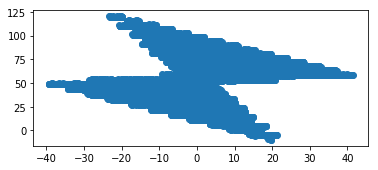

In [135]:
pred_val = lm.fittedvalues.copy()
true_val = data['Wallet_trx'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

**Autocorrelation**: The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

**How to check**: Look for Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation. Also, you can see residual vs time plot and look for the seasonal or correlated pattern in residual values.

DW = 1.152 implies that Positive Autocorrelation exists.

**Multicollinearity**: This phenomenon exists when the independent variables are found to be moderately or highly correlated. In a model with correlated variables, it becomes a tough task to figure out the true relationship of a predictors with response variable. In other words, it becomes difficult to find out which variable is actually contributing to predict the response variable.

**How to check**: You can use scatter plot to visualize correlation effect among variables. Also, you can also use VIF factor. VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.

In [127]:
print(X.corr())

          Qtr1_Bal  Qtr2_Bal  Qtr3_Bal  Qtr4_Bal    Female      Male  \
Qtr1_Bal  1.000000  1.000000  0.026619  0.940876  0.004854 -0.004854   
Qtr2_Bal  1.000000  1.000000  0.026619  0.940876  0.004854 -0.004854   
Qtr3_Bal  0.026619  0.026619  1.000000  0.028885 -0.010377  0.010377   
Qtr4_Bal  0.940876  0.940876  0.028885  1.000000 -0.002037  0.002037   
Female    0.004854  0.004854 -0.010377 -0.002037  1.000000 -1.000000   
Male     -0.004854 -0.004854  0.010377  0.002037 -1.000000  1.000000   
North    -0.005816 -0.005816 -0.003464 -0.004433 -0.009057  0.009057   
South    -0.018943 -0.018943 -0.005602 -0.017841  0.021190 -0.021190   
East     -0.007024 -0.007024 -0.009794 -0.005560  0.013203 -0.013203   
West      0.026698  0.026698  0.014570  0.023510 -0.019487  0.019487   

             North     South      East      West  
Qtr1_Bal -0.005816 -0.018943 -0.007024  0.026698  
Qtr2_Bal -0.005816 -0.018943 -0.007024  0.026698  
Qtr3_Bal -0.003464 -0.005602 -0.009794  0.014570  
Qtr

We can see that Qtr1_Bal and Qtr2_Bal are highly correlated. Similarly, Qtr1_Bal and Qtr4_Bal, Qtr2_Bal and Qtr4_Bal are also highly correlated. 

This can be resolved by using either one from Qtr1_Bal, Qtr2_Bal and Qtr4_Bal variables.

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)


   VIF Factor  features
0    1.001503  Qtr1_Bal
1    1.001041  Qtr3_Bal
2         inf    Female
3         inf      Male
4         inf     North
5         inf     South
6         inf      East
7         inf      West


C:\Users\ab275\AppData\Roaming\Python\Python36\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


**Heteroskedasticity**: The presence of non-constant variance in the error terms results in heteroskedasticity. Generally, non-constant variance arises in presence of outliers or extreme leverage values. Look like, these values get too much weight, thereby disproportionately influences the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

**How to check**: You can look at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern (shown in next section). Also, you can use Breusch-Pagan / Cook – Weisberg test or White general test to detect this phenomenon.

In [145]:
import statsmodels
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual, data[['Qtr1_Bal', 'Qtr2_Bal', 'Qtr3_Bal','Qtr4_Bal','Female', 'Male', 'North','South','East','West']])
pval, f_pval

AttributeError: module 'statsmodels.stats' has no attribute 'diagnostic'

**Normal Distribution of error terms**: If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Presence of non – normal distribution suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to check**: You can look at QQ plot (shown below). You can also perform statistical tests of normality such as Kolmogorov-Smirnov test, Shapiro-Wilk test.

Text(0.5,1,'Model Residuals Probability Plot')

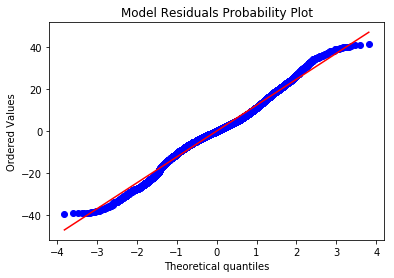

In [130]:
from scipy import stats
stats.probplot(lm.resid, plot= plt)
plt.title("Model Residuals Probability Plot")

This Model Residuals probability plot is a scatter plot which helps us validate the assumption of normal distribution in a data set. Using this plot we can infer if the data comes from a normal distribution. If yes, the plot would show fairly straight line. Absence of normality in the errors can be seen with deviation in the straight line.

Since, here the plot is a fairly straight line, thus normality is absent.